## Logistic Regression
# Baseline Model


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import pandas as pd

train_clean = pd.read_csv("train_cleaned.csv")
test_clean = pd.read_csv("test_cleaned.csv")

# Split again
X_train = train_clean.drop("Survived", axis=1)
y_train = train_clean["Survived"]
X_test = test_clean  # no Survived column


In [3]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [4]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_split, y_train_split)

c:\Users\Gairo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [5]:
y_pred = log_reg.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8212290502793296

Confusion Matrix:
 [[89 16]
 [16 58]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       105
         1.0       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [6]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # use train stats


In [7]:
X_train = X_train.fillna(X_train.mode().iloc[0])
X_test = X_test.fillna(X_train.mode().iloc[0])


In [8]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)



In [9]:
log_reg_final = LogisticRegression(max_iter=200)
log_reg_final.fit(X_train, y_train)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test_pred = log_reg_final.predict(X_test)


c:\Users\Gairo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


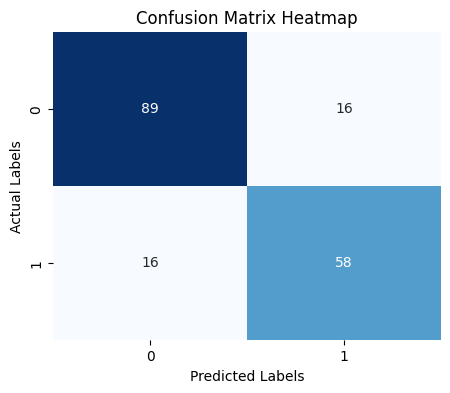

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: assuming y_test = actual values, y_pred = your model’s predictions
cm = confusion_matrix(y_pred, y_val)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


🧮 Logistic Regression – Pros and Cons
✅ Pros

# Simple and easy to implement – conceptually straightforward and computationally efficient.

# Interpretable results – model coefficients show how each feature affects the outcome.

# Works well for linearly separable data – effective when there’s a clear linear boundary between classes.

# Probabilistic output – provides predicted probabilities instead of just class labels.

# Regularization support – helps reduce overfitting using L1 (Lasso) or L2 (Ridge) penalties.

# Fast training and prediction – ideal for baseline models and smaller datasets.

# Performs well with fewer features – especially when irrelevant or redundant features are removed.


❌ Cons

<!-- Assumes linear relationship between independent variables and the log-odds of the target — can’t handle complex, non-linear patterns.

Sensitive to outliers – extreme values can distort model coefficients.

Requires feature scaling – especially when using regularization.

Limited handling of missing values and categorical variables – requires preprocessing (encoding, imputation).

Cannot automatically capture feature interactions – you must manually create interaction terms.

Struggles with high-dimensional or highly correlated data – may lead to unstable estimates.

Not ideal for non-linear decision boundaries – performance drops when data is not linearly separable. -->